In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, HDBSCAN

In [3]:
path = "~/Documents/spatial_clustering/final_project/data/"
census_df = gpd.read_file(
    path + "census_tracts/geo_export_a19e0577-c0ec-456a-8bea-703d57c3459d.shp"
)[['geoid10', 'geometry']]
census_df

,geoid10,geometry
0,17031842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,17031840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,17031841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,17031841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,17031839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...
796,17031070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
797,17031070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930..."
798,17031130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982..."
799,17031292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855..."


In [4]:
bus_point_df = gpd.read_file(
    path + "CTA_BusStops/CTA_BusStops.shp"
)
bus_point_df.centroid

/var/folders/d4/vbphhpzx0_585fnvq9gjq5z00000gn/T/ipykernel_47134/1163620520.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bus_point_df.centroid


0        POINT (-87.57521 41.71888)
1        POINT (-87.63563 41.92192)
2        POINT (-87.80512 41.89619)
3        POINT (-87.63168 41.83648)
4        POINT (-87.62419 41.86388)
                    ...            
10755    POINT (-87.80521 41.89799)
10756    POINT (-87.67337 41.76837)
10757    POINT (-87.74420 41.85310)
10758    POINT (-87.58530 41.74246)
10759    POINT (-87.71334 41.97013)
Length: 10760, dtype: geometry

In [5]:
bus_coords_array = np.vstack([bus_point_df.centroid.x, bus_point_df.centroid.y]).T
bus_coords_array

/var/folders/d4/vbphhpzx0_585fnvq9gjq5z00000gn/T/ipykernel_47134/1395496066.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bus_coords_array = np.vstack([bus_point_df.centroid.x, bus_point_df.centroid.y]).T


array([[-87.575215  ,  41.718878  ],
       [-87.63562557,  41.92192341],
       [-87.80511621,  41.89618784],
       ...,
       [-87.744202  ,  41.853097  ],
       [-87.58530252,  41.74246334],
       [-87.713342  ,  41.970134  ]])

In [6]:
# Function DBSCAN is used to fit the clustering method to the coordinates of our], with set values
# for Eps and MinPts:
db_results = DBSCAN(eps=.003, min_samples=10).fit(bus_coords_array)

# Creating a list with the clusters assignments and converting the labels to string:
db_labels = [str(label) for label in db_results.labels_]

# Counting the number of resulting clusters in labels, ignoring noise if present:
n_clusters = len(set(db_labels)) - (1 if '-1' in db_labels else 0)

# Counting the number of noise points:
n_noise = db_labels.count('-1')

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

Estimated number of clusters: 311
Estimated number of noise points: 3367


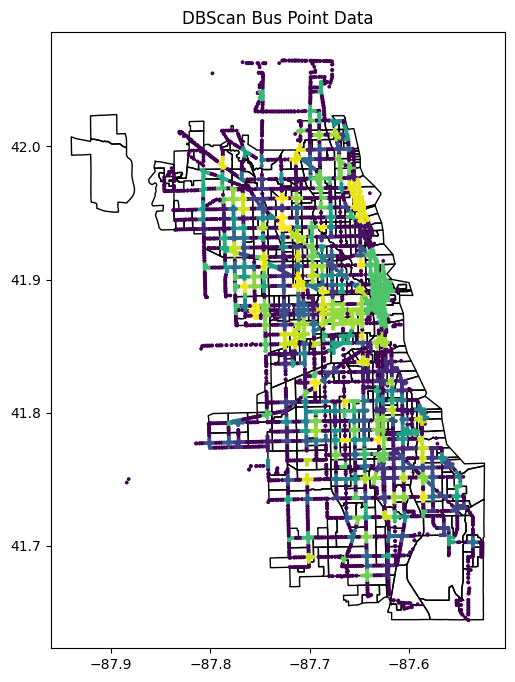

In [7]:
chi_census = census_df.to_crs(bus_point_df.crs)

bus_point_df['db_cluster'] = db_labels
fig, ax = plt.subplots(figsize=(8, 8))
chi_census.plot(ax=ax, color='none', edgecolor='black') 
bus_point_df.plot(column='db_cluster', ax=ax, cmap='viridis', markersize=3)
plt.title('DBScan Bus Point Data')
# plt.savefig("../figures/dbscan_eps003minsamp10.png")
plt.show()

There doesn't seem to be a great configuration to make more spatially defined/neighborhood defined clusters

In [10]:
# Function HDBSCAN is used to fit the clustering method to the coordinates of our liquor stores, with set value
# for min_cluster_size:
hdb_results = HDBSCAN(min_cluster_size=8).fit(bus_coords_array)

# Creating a list with the clusters assignments and converting the labels to string:
hdb_labels = [str(label) for label in hdb_results.labels_]

# Counting the number of resulting clusters in labels, ignoring noise if present:
n_clusters_ = len(set(hdb_labels)) - (1 if '-1' in hdb_labels else 0)

# Counting the number of noise points:
n_noise_ = hdb_labels.count('-1')

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 351
Estimated number of noise points: 3590


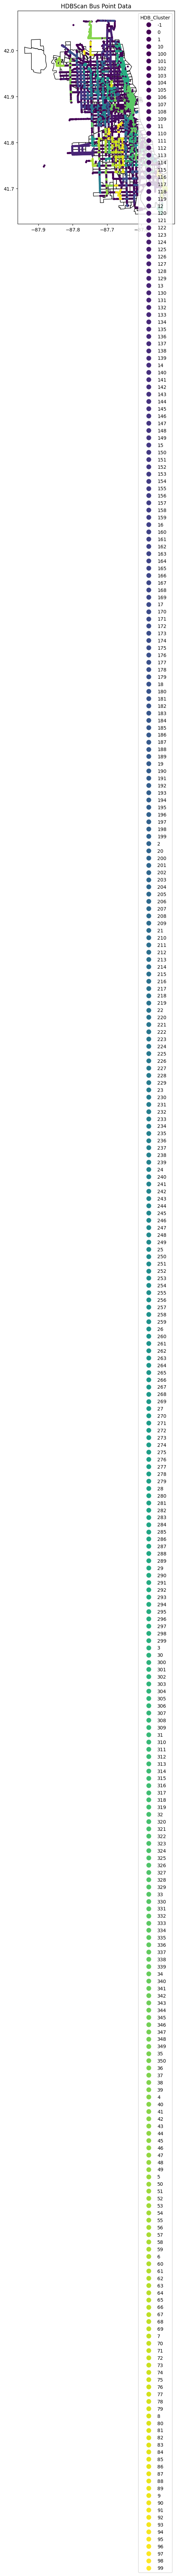

In [12]:
bus_point_df['hdb_cluster'] = hdb_labels
fig, ax = plt.subplots(figsize=(8, 8))
chi_census.plot(ax=ax, color='none', edgecolor='black') 
bus_point_df.plot(column='hdb_cluster', ax=ax, cmap='viridis', legend=True, markersize=10, 
              legend_kwds={'loc': 'upper right', 'title': 'HDB_Cluster'})
plt.title('HDBScan Bus Point Data')
plt.savefig("../figures/hdbscan_mincluster8.png")
plt.show()